In [5]:
import csv
import numpy as np 
import matplotlib.pyplot as plt

Tahmini regresyon katsayıları :  [[  1.70474504  15.04062212 -20.47216021]]
yinelemme sayısı :  2612
Doğru tahmin edilen etiketler :  100


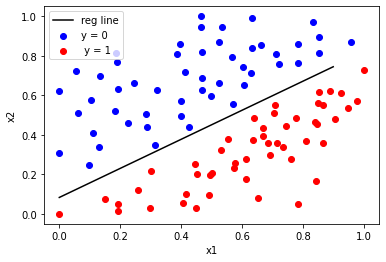

In [22]:
def loadCSV(filename):
  with open(filename,"r") as csvfile:
    lines = csv.reader(csvfile)
    dataset = list(lines)
    for i in range(len(dataset)):
      dataset[i] = [float(x) for x in dataset[i]]
  return np.array(dataset)

def normalize(X):
  mins = np.min(X,axis = 0)
  maxs = np.max(X,axis = 0)
  rng = maxs - mins
  norm_X = 1-((maxs - X)/rng)
  return norm_X

def logistic_func(beta,X):
  return 1.0/(1+np.exp(-np.dot(X,beta.T)))

def log_gradient(beta,X,y):
  first_calc = logistic_func(beta,X) - y.reshape(X.shape[0],-1)
  final_calc = np.dot(first_calc.T,X)
  return final_calc

def cost_func(beta,X,y):
  log_func_v = logistic_func(beta,X)
  y = np.squeeze(y)
  step1 = y*np.log(log_func_v)
  step2 = (1 - y)*np.log(1-log_func_v)
  final = -step1 - step2
  return np.mean(final)

def grad_desc(X,y,beta,lr = .01, converge_change= .001):
  cost = cost_func(beta,X,y)
  change_cost = 1
  num_iter = 1 

  while(change_cost>converge_change):
    old_cost = cost
    beta = beta - (lr*log_gradient(beta,X,y))
    cost = cost_func(beta,X,y)
    change_cost = old_cost - cost
    num_iter += 1
  return beta,num_iter

def pred_values(beta,X):
  pred_prob = logistic_func(beta,X)
  pred_value = np.where(pred_prob >= .5,1,0)
  return np.squeeze(pred_value)

def plot_reg(X,y,beta):
  x_0 = X[np.where(y == 0.0)]
  x_1 = X[np.where(y == 1.0)]

  plt.scatter([x_0[:,1]],[x_0[:,2]], c = 'b', label = 'y = 0')
  plt.scatter([x_1[:,1]],[x_1[:,2]], c = 'r', label = ' y = 1')

  x1 = np.arange(0,1,0.1)
  x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2]
  plt.plot(x1,x2,c = 'k', label = 'reg line')

  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.legend()
  plt.show()

if __name__ == "__main__":
  dataset = loadCSV('dataset1.csv')
  X = normalize(dataset[:,:-1])
  X = np.hstack((np.matrix(np.ones(X.shape[0])).T,X))
  y = dataset[:,-1]
  beta = np.matrix(np.zeros(X.shape[1]))
  beta, num_iter = grad_desc(X,y,beta)
  print("Tahmini regresyon katsayıları : ",beta)
  print("yinelemme sayısı : ",num_iter)
  y_pred = pred_values(beta,X)
  print("Doğru tahmin edilen etiketler : ",np.sum(y == y_pred))
  plot_reg(X,y,beta)